In [21]:
import numpy as np
import pandas as pd

In [22]:
df=pd.read_csv("Patient.csv")
df

,Age,Severity,Surg-Med,Anxiety,Satisfaction
0,55,50,0,2.1,68
1,46,24,1,2.8,77
2,30,46,1,3.3,96
3,35,48,1,4.5,80
4,59,58,0,2.0,43
5,61,60,0,5.1,44
6,74,65,1,5.5,26
7,38,42,1,3.2,88
8,27,42,0,3.1,75
9,51,50,1,2.4,57


In [23]:
df.columns

Index(['Age', 'Severity', 'Surg-Med', 'Anxiety', 'Satisfaction'], dtype='object')

In [24]:
df.head()

,Age,Severity,Surg-Med,Anxiety,Satisfaction
0,55,50,0,2.1,68
1,46,24,1,2.8,77
2,30,46,1,3.3,96
3,35,48,1,4.5,80
4,59,58,0,2.0,43


In [25]:
df.tail()

,Age,Severity,Surg-Med,Anxiety,Satisfaction
20,70,41,1,7.0,59
21,79,66,1,6.2,26
22,63,31,1,4.1,52
23,39,42,0,3.5,83
24,49,40,1,2.1,75


In [26]:
df.dtypes

Age               int64
Severity          int64
Surg-Med          int64
Anxiety         float64
Satisfaction      int64
dtype: object

In [27]:
df.isna().sum()

Age             0
Severity        0
Surg-Med        0
Anxiety         0
Satisfaction    0
dtype: int64

In [28]:
x=df.iloc[:,:-1]  
y=df.iloc[:,-1]

<Axes: xlabel='Age', ylabel='Satisfaction'>

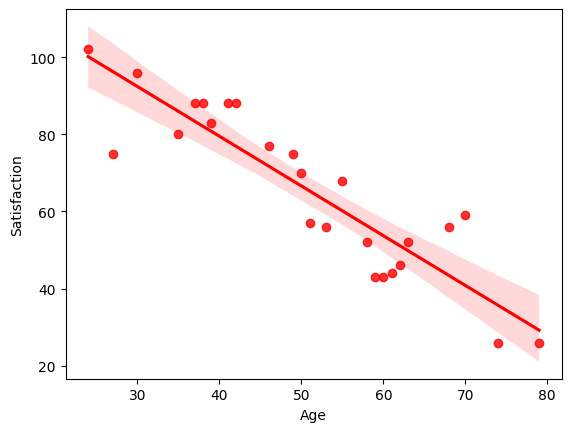

In [29]:
#seaborn ==> regplot
# pip install seaborn
import seaborn as sns
sns.regplot(x=df['Age'],y=y,color='red')

<Axes: xlabel='Severity', ylabel='Satisfaction'>

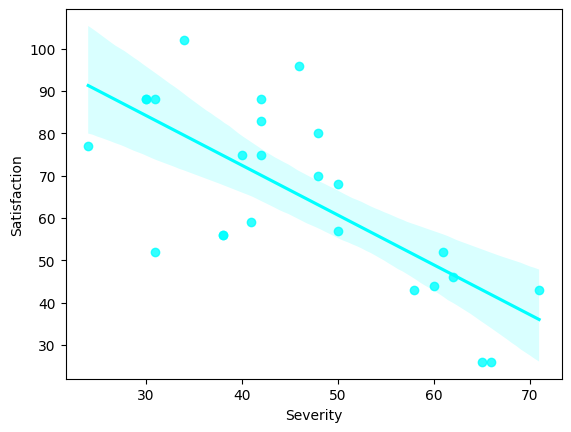

In [30]:
sns.regplot(x=df['Severity'],y=y,color='cyan')

<Axes: xlabel='Surg-Med', ylabel='Satisfaction'>

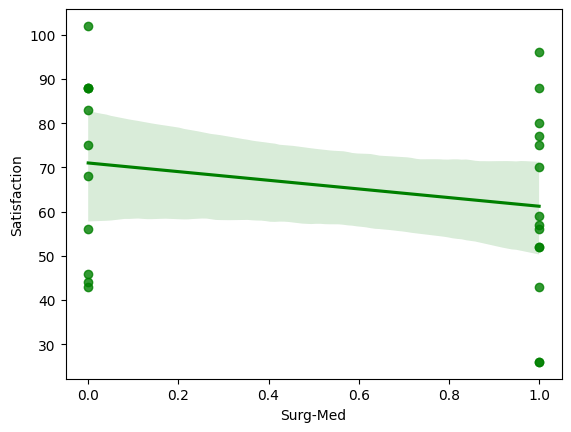

In [31]:
sns.regplot(x=df['Surg-Med'],y=y,color='green')

<Axes: xlabel='Anxiety', ylabel='Satisfaction'>

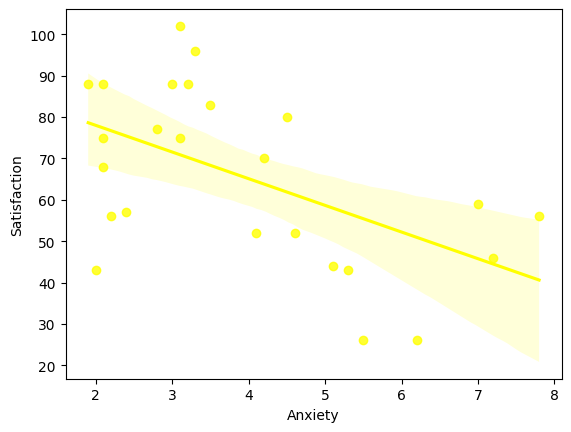

In [32]:
sns.regplot(x=df['Anxiety'],y=y,color='yellow')

In [33]:
#Converting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()   #Object creation
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
#Model Creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 97.43611584,  49.75342486,  52.43797277,  82.31330577,
        83.33941176,  60.25569593, 106.30134906,  83.6915216 ])

In [36]:
y_test

8      75
16     52
0      68
23     83
11     88
9      57
13    102
1      77
Name: Satisfaction, dtype: int64

In [37]:
df1 = pd.DataFrame({'Actual_value': y_test,'Predicted_value': y_pred})
print(df1)

    Actual_value  Predicted_value
8             75        97.436116
16            52        49.753425
0             68        52.437973
23            83        82.313306
11            88        83.339412
9             57        60.255696
13           102       106.301349
1             77        83.691522


In [38]:
#Performanace Evaluation Methods
#______________________________________________________________

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error is',root_mean_squared_error(y_test,y_pred))
print('R2_Square is',r2_score(y_test,y_pred))

Mean Absolute Error is 7.480070909337515
Mean Absolute Percentage Error is 0.10232875182984509
Mean Squared Error is 105.83416729520312
Root Mean Squared Error is 10.287573440573977
R2_Square is 0.5466273957902945


In [39]:
print("Slope is",model.coef_)

Slope is [-18.98845844  -7.80280496   0.80433657   4.69373743]


In [40]:
print("Constant is",model.intercept_)

Constant is 60.94117647058824
